<a href="https://colab.research.google.com/github/Johnfratelli/caminhos-da-estatistica/blob/main/caminhos_da_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

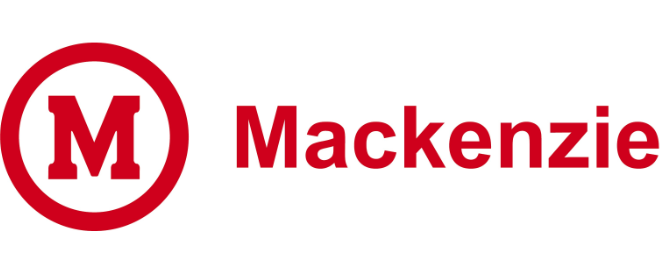

# **PROJETO APLICADO II - CURSO CIENCIA DE DADOS - ANO 2024 - 2º SEMESTRE**

**Grupo: Caminhos-da-estatistica**

***Andre Gustavo Monteiro Dos Santos F – RA 10424359***

***Raul Santos Lages – RA 10424621***

***Grabiel Santos de Oliveira – RA 10424642***

***Fernando da Silva Cordeiro de Lima – RA 10424794***

In [80]:
!pip install wordcloud
!pip install datasets
!pip install vaderSentiment
!pip install catboost
!pip install xgboost
!pip install lightgbm

In [81]:


import re
import unicodedata
import itertools
from datasets import load_dataset

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np


# Visualização de dados
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# ML NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [82]:
review = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
review = review["full"]
print(review)

produto = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
print(produto)

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 701528
})
Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
    num_rows: 112590
})


In [83]:
#Demora uns 2 min para conferter od dataset para o pandas.


review_df = pd.DataFrame(review)

produto_df = pd.DataFrame(produto)

In [84]:
review_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [85]:
produto_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],None,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Howard Products,[],"{""Package Dimensions"": ""7.1 x 5.5 x 3 inches; ...",B01CUPMQZE,None,None,None
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Yes To,[],"{""Item Form"": ""Powder"", ""Skin Type"": ""Acne Pro...",B076WQZGPM,None,None,None
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],None,"{'hi_res': [None, None], 'large': ['https://m....","{'title': [], 'url': [], 'user_id': []}",Levine Health Products,[],"{""Manufacturer"": ""Levine Health Products""}",B000B658RI,None,None,None
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Cherioll,[],"{""Brand"": ""Cherioll"", ""Item Form"": ""Powder"", ""...",B088FKY3VD,None,None,None
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"[Material: 304 Stainless Steel; Brass tip, Len...",[The Precision Plunger Bars are designed to wo...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Precision,[],"{""UPC"": ""644287689178""}",B07NGFDN6G,None,None,None


In [86]:
review_df.tail()
produto_df.tail()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
112585,All Beauty,"TOPREETY 24""120gr 3/4 Full Head clip in hair e...",5.0,3,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",TOPREETY,[],"{""Is Discontinued By Manufacturer"": ""No"", ""Pac...",B077D2Z5RF,None,None,None
112586,All Beauty,"Pets Playmate Pet Grooming Glove,Gentle Deshed...",5.0,1,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Pets Playmate,[],"{""Is Discontinued By Manufacturer"": ""No"", ""Pac...",B07DLRYKQZ,None,None,None
112587,All Beauty,[10Pack] Makeup Brushes Set Cosmetics Tools Ki...,4.3,5,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",RainMakers,[],"{""Brand"": ""RainMakers"", ""Recommended Uses For ...",B07HNP2NTF,None,None,None
112588,All Beauty,Xcoser Pretty Party Anna Wig Hair Tails Hair S...,4.0,9,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Xcoser,[],"{""Is Discontinued By Manufacturer"": ""No"", ""Pac...",B00U3OB8PY,None,None,None
112589,All Beauty,"DVIO Men's Voyage Perfume, Spicy woody fragran...",1.8,2,"[Features: Spicy woody notes, pure sandalwood ...",[],27.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",DVIO,[],"{""UPC"": ""736238729337"", ""Manufacturer"": ""DVIO""}",B09B9TCYWG,None,None,None


In [87]:
review_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [88]:
produto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112590 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            112590 non-null  object 
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101259 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       object 
 14  subtitle         0 non-null       object 
 15  author           0 non-null       object 
dtypes: float64(1), int64(1), object(14)
me

In [89]:
review_df.shape




(701528, 10)

In [90]:
produto_df.shape

(112590, 16)

In [91]:
df = pd.merge(review_df, produto_df, on='parent_asin', how='inner')

In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title_x            701528 non-null  object 
 2   text               701528 non-null  object 
 3   images_x           701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
 10  main_category      701528 non-null  object 
 11  title_y            701528 non-null  object 
 12  average_rating     701528 non-null  float64
 13  rating_number      701528 non-null  int64  
 14  features           701528 non-null  object 
 15  description        701528 non-null  object 
 16  pr

In [93]:
print(df.isnull().sum())

rating                    0
title_x                   0
text                      0
images_x                  0
asin                      0
parent_asin               0
user_id                   0
timestamp                 0
helpful_vote              0
verified_purchase         0
main_category             0
title_y                   0
average_rating            0
rating_number             0
features                  0
description               0
price                     0
images_y                  0
videos                    0
store                 49892
categories                0
details                   0
bought_together      701528
subtitle             701528
author               701528
dtype: int64


In [94]:
df = df.dropna(axis=1)

In [95]:
print(df.isnull().sum())

rating               0
title_x              0
text                 0
images_x             0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
main_category        0
title_y              0
average_rating       0
rating_number        0
features             0
description          0
price                0
images_y             0
videos               0
categories           0
details              0
dtype: int64


In [96]:

df = df.iloc[:20000]


# Print info
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             20000 non-null  float64
 1   title_x            20000 non-null  object 
 2   text               20000 non-null  object 
 3   images_x           20000 non-null  object 
 4   asin               20000 non-null  object 
 5   parent_asin        20000 non-null  object 
 6   user_id            20000 non-null  object 
 7   timestamp          20000 non-null  int64  
 8   helpful_vote       20000 non-null  int64  
 9   verified_purchase  20000 non-null  bool   
 10  main_category      20000 non-null  object 
 11  title_y            20000 non-null  object 
 12  average_rating     20000 non-null  float64
 13  rating_number      20000 non-null  int64  
 14  features           20000 non-null  object 
 15  description        20000 non-null  object 
 16  price              200

In [97]:
# prompt: total de lindas do df

print(len(df))

20000


In [98]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

### Baixe os recursos necessários do nltk (tokenizers e stopwords corpus)
# Tokenizer de punkt para tokenização de palavras
nltk.download('punkt')

# Lista de palavras irrelevantes em vários idiomas
nltk.download('stopwords')

# Inicializar o lematizador Porter e carregar palavras irrelevantes em inglês
stemmer = PorterStemmer()

# Crie um conjunto de palavras irrelevantes em inglês para uma pesquisa eficiente
stop_words = set(stopwords.words('english'))

# Função para limpar o texto removendo URLs, identificadores e pontuação
def clean_text(text):
    if isinstance(text, str):
        # Converter texto em minúsculas
        text = text.lower()

        # Remover URLs (links http, https e www)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remover links no estilo markdown [text](link)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        # Remover alças (@username menções)
        text = re.sub(r'@\w+', '', text)

        # Remover pontuação e caracteres especiais
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

# Função para tokenizar o texto em palavras individuais
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

# Função para remover palavras irrelevantes do texto indexado
def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

# Função para aplicar a lematização aos tokens
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens

### Aplique as funções ao DataFrame
# Limpe o texto
df['Cleaned_Review'] = df['text'].apply(clean_text)

# Tokenize the cleaned text
df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_text)

# Tokenize o texto limpo
df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)

# Remova as palavras irrelevantes do texto tokenizado
df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)

#Display as primeiras linhas do DataFrame para visualizar o conjunto de dados
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,description,price,images_y,videos,categories,details,Cleaned_Review,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,...,"[If given the choice, weÕd leave most telltale...",None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Best Hair Product For Summer!', 'O...",[],"{""Hair Type"": ""Wavy"", ""Material Type Free"": ""D...",this spray is really nice it smells really goo...,"[this, spray, is, really, nice, it, smells, re...","[thi, spray, is, realli, nice, it, smell, real...","[spray, really, nice, smells, really, good, go..."
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,...,[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Easy to apply!'], 'url': ['https:/...",[],"{""Brand"": ""Two Goats Apothecary"", ""Item Form"":...",this product does what i need it to do i just ...,"[this, product, does, what, i, need, it, to, d...","[thi, product, doe, what, i, need, it, to, do,...","[product, need, wish, odorless, soft, coconut,..."
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,...,[New Road Beauty Paraffin Wax is recommended f...,21.98,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Opening the Creamsicle assortment ...,[],"{""Package Dimensions"": ""10.5 x 6.4 x 1.6 inche...",smells good feels great,"[smells, good, feels, great]","[smell, good, feel, great]","[smells, good, feels, great]"
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,...,[Hair Material: Brazilian Virgin Human Hair Bu...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",[],"{""Brand"": ""muaowig"", ""Material"": ""Human Hair"",...",felt synthetic,"[felt, synthetic]","[felt, synthet]","[felt, synthetic]"
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,...,[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",[],"{""Package Dimensions"": ""8.5 x 3.82 x 2.24 inch...",love it,"[love, it]","[love, it]",[love]


**Análise de Sentimentos com Vader**

In [99]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Crie uma instância de SentimentIntensityAnalyzer, que faz parte da ferramenta de análise de sentimento VADER.
analyzer = SentimentIntensityAnalyzer()

# Função para aplicar a análise de sentimento do VADER a cada revisão.
# A função recebe uma 'revisão' (texto) e retorna as pontuações de polaridade, que incluem
# Valores de sentimento 'compostos', 'positivos', 'negativos' e 'neutros'.
def get_sentiment(review):
    return analyzer.polarity_scores(review)

# Aplique a função 'get_sentiment' a cada entrada na coluna 'Cleaned_Review'.
# Armazene as pontuações de sentimento resultantes (dicionário) em uma nova coluna 'vader_scores'.
df['vader_scores'] = df['Cleaned_Review'].apply(get_sentiment)

# Extraia a pontuação 'composta' do dicionário 'vader_scores' para cada revisão.
# A pontuação 'composta' é uma pontuação normalizada que varia de -1 (mais negativo) a +1 (mais positivo),
# resumindo o sentimento geral do texto.
df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Função para classificar o sentimento com base na pontuação 'composta'.
# As pontuações >= 0,05 são classificadas como 'Positivas', <= -0,05 como 'Negativas' e qualquer outra coisa entre elas como 'Neutras'.
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positivo'
    elif compound_score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplique a função 'classify_sentiment' à pontuação 'composta' para obter o sentimento geral
# classificação (Positiva, Negativa ou Neutra) para cada avaliação.
df['sentiment'] = df['compound'].apply(classify_sentiment)

# Exibe as primeiras linhas do DataFrame, mostrando o texto de revisão limpo,
# a pontuação de sentimento 'composto' e o 'sentimento' classificado.
print(df[['Cleaned_Review', 'compound', 'sentiment']].head(10))

                                      Cleaned_Review  compound sentiment
0  this spray is really nice it smells really goo...    0.8008  Positivo
1  this product does what i need it to do i just ...    0.7783  Positivo
2                            smells good feels great    0.7906  Positivo
3                                     felt synthetic    0.0000    Neutro
4                                            love it    0.6369  Positivo
5  the polish was quiet thick and did not apply s...    0.0000    Neutro
6  great for many tasks  i purchased these for ma...    0.8458  Positivo
7  these were lightweight and soft but much too s...    0.5499  Positivo
8  this is perfect for my between salon visits i ...    0.9873  Positivo
9  i get keratin treatments at the salon at least...    0.9537  Positivo


Neste script, aplicamos a ferramenta de análise de sentimentos VADER (Valence Aware Dictionary and sEntiment Reasoner) para classificar o sentimento de avaliações textuais. VADER é um modelo popular baseado em regras usado para analisar o sentimento expresso em texto, projetado especificamente para lidar com mídias sociais, mas aplicável a qualquer tipo de dado textual.

Análise de sentimentos com VADER: Começamos inicializando uma instância do SentimentIntensityAnalyzer, que calcula a polaridade de um determinado texto. VADER calcula quatro pontuações de sentimentos para cada avaliação: positiva, negativa, neutra e uma pontuação composta. A pontuação composta representa um sentimento geral, normalizado entre -1 (extremamente negativo) a +1 (extremamente positivo).

Extração da pontuação composta: Depois de aplicar VADER a cada avaliação na coluna Cleaned_Review, armazenamos os resultados em uma nova coluna vader_scores. Deste dicionário, extraímos especificamente a pontuação composta, o que simplifica a tarefa de classificar o sentimento geral em "Positivo", "Negativo" ou "Neutro" com base em limites definidos.

Classificando sentimentos: A função classify_sentiment usa a pontuação composta para categorizar o sentimento. Uma pontuação maior ou igual a 0,05 indica um sentimento positivo, uma pontuação menor ou igual a -0,05 indica um sentimento negativo e qualquer coisa entre os dois é considerada neutra. Essa classificação ajuda a entender o tom emocional transmitido no texto da revisão.

Saída final: Após aplicar a classificação de sentimento, o DataFrame agora contém colunas para o texto original da revisão limpa, a pontuação composta e o rótulo do sentimento final. Isso permite uma interpretação fácil das pontuações numéricas de sentimento e suas respectivas categorias (Positivo, Neutro ou Negativo). Em seguida, exibimos as primeiras entradas para visualizar os resultados.

No geral, este script demonstra uma maneira simples e eficaz de realizar análise de sentimentos em dados de texto usando o VADER, permitindo a categorização automatizada do tom emocional em avaliações de clientes, feedback ou qualquer outra forma de texto escrito."


<ipython-input-100-29e52d5f92e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


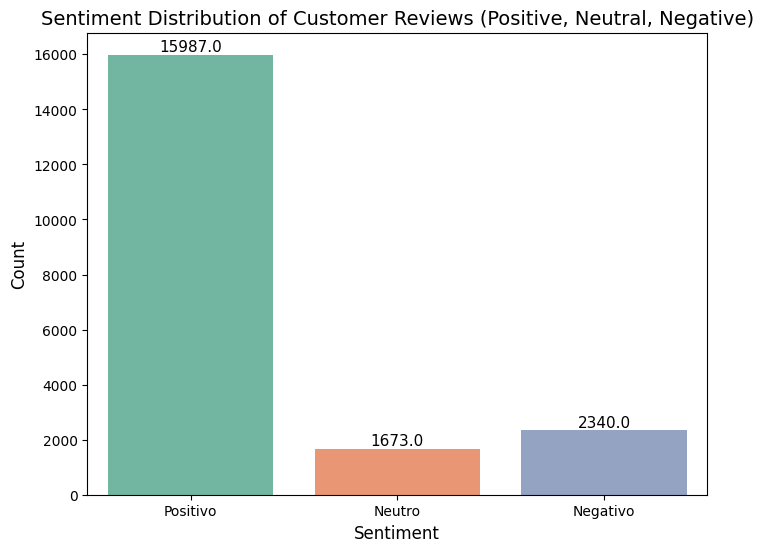

In [100]:
# Assuming df is already loaded and contains the 'sentiment' column
plt.figure(figsize=(8, 6))

# Count plot with a specific color palette
sns.countplot(data=df, x='sentiment', palette='Set2')

# Add title and axis labels with adjusted font sizes
plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=11)

# Display the plot
plt.show()

**# Análise**

**Dominância de sentimento positivo**: - A esmagadora maioria das avaliações é classificada como positiva (525.365 contagens). Isso sugere que os clientes estão geralmente satisfeitos ou expressando opiniões favoráveis ​​nas avaliações.

**Sentimento neutro:** - Há um número significativamente menor de avaliações classificadas como neutras (77.025 contagens). Isso significa que poucas avaliações não são nem fortemente positivas nem negativas, mostrando uma falta de feedback intermediário.

**Sentimento negativo:** - Uma pequena parte das avaliações é classificada como negativa (99.138 contagens). Embora menos do que avaliações positivas, isso indica que alguns clientes estão compartilhando insatisfação ou experiências negativas.

**Representação visual: **- O gráfico de barras destaca claramente a distribuição desproporcional de sentimentos, onde as avaliações positivas superam em muito os sentimentos negativos e neutros.

A rotulagem é bem feita, com os números de contagem exatos anotados no topo de cada barra, permitindo fácil compreensão dos dados.
Melhorias no equilíbrio: - Se o conjunto de dados visa representar uma análise de sentimento equilibrada, pode ser necessário reunir ou equilibrar mais avaliações negativas ou neutras para evitar o domínio do sentimento positivo. Alternativamente, tal desequilíbrio pode ser um reflexo de uma experiência do cliente geralmente positiva.

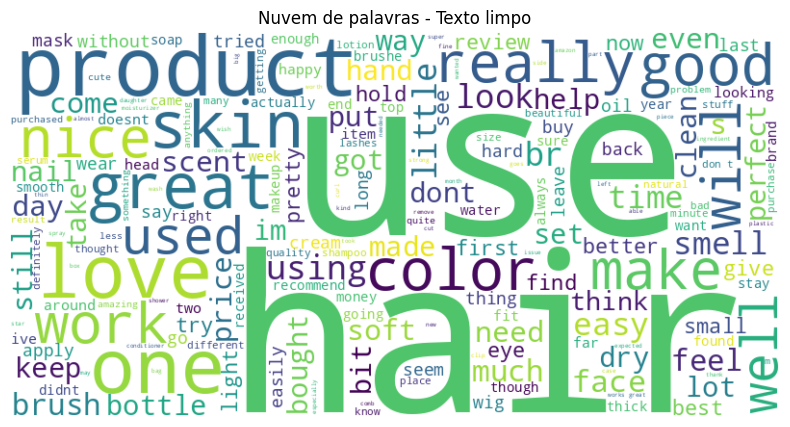

In [101]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(' '.join(df['Cleaned_Review'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de palavras - Texto limpo")
plt.show()

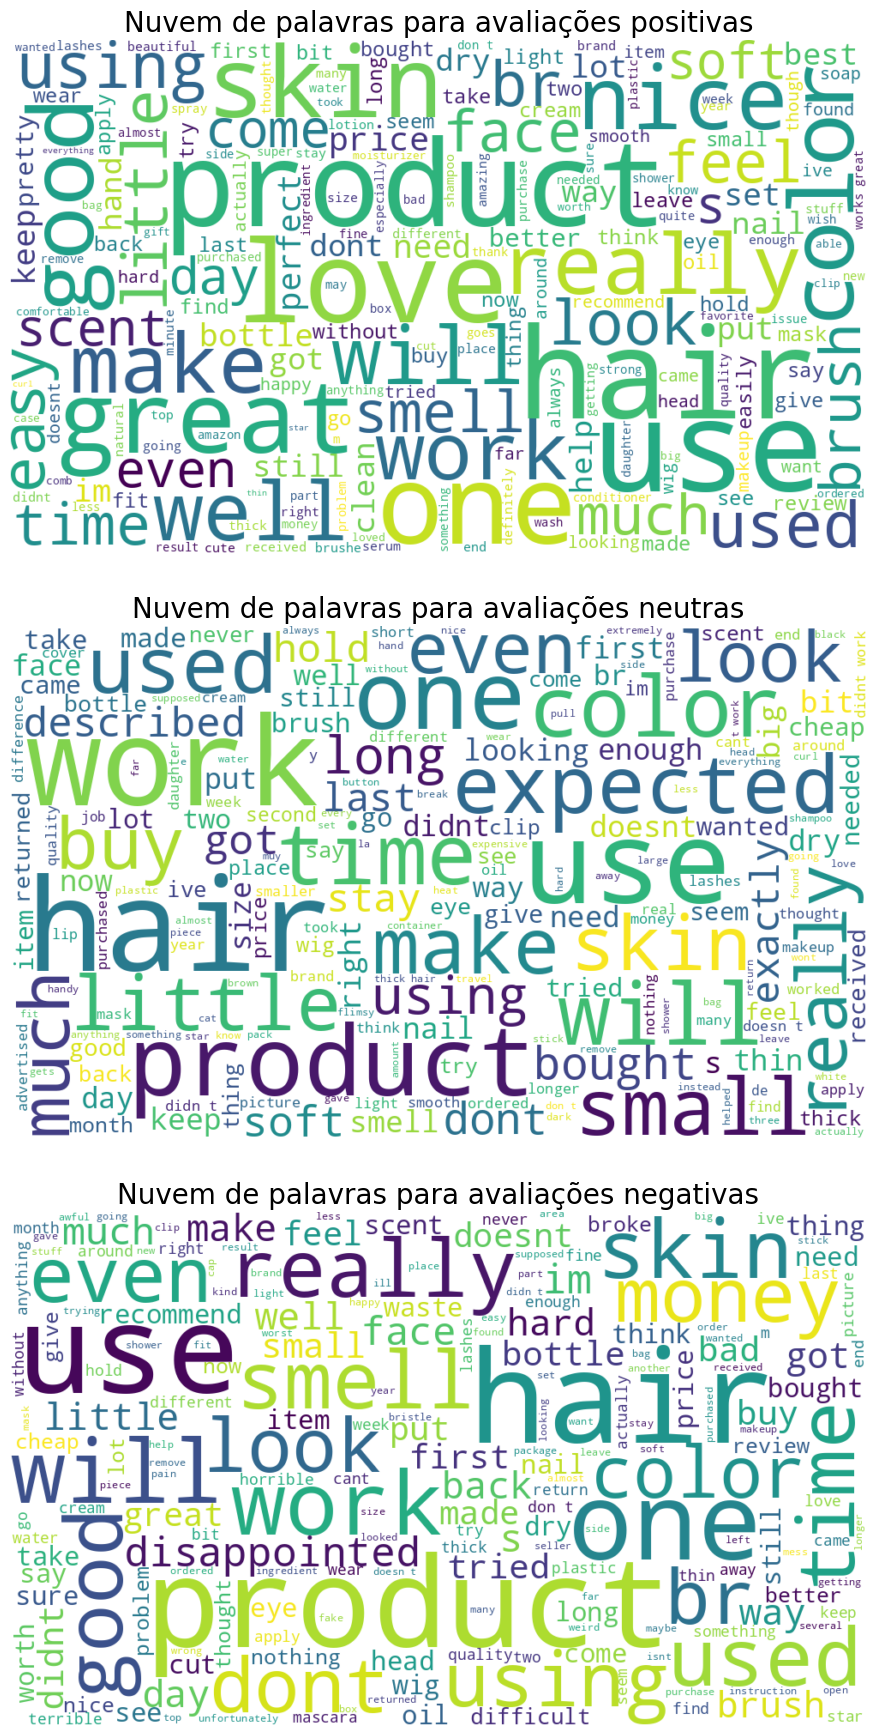

In [102]:
# Separate reviews based on sentiment
positive_reviews = " ".join(df[df['sentiment'] == 'Positivo']['Cleaned_Review'].tolist())
neutral_reviews = " ".join(df[df['sentiment'] == 'Neutro']['Cleaned_Review'].tolist())
negative_reviews = " ".join(df[df['sentiment'] == 'Negativo']['Cleaned_Review'].tolist())

# Generate word clouds with larger dimensions and font size
wordcloud_positive = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(positive_reviews)
wordcloud_neutral = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(neutral_reviews)
wordcloud_negative = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(negative_reviews)

# Plot the word clouds for each sentiment with larger figure size
plt.figure(figsize=(10, 18))

# Positive word cloud
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Nuvem de palavras para avaliações positivas', fontsize=20)
plt.axis('off')

# Neutral word cloud
plt.subplot(3, 1, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Nuvem de palavras para avaliações neutras', fontsize=20)
plt.axis('off')

# Negative word cloud
plt.subplot(3, 1, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Nuvem de palavras para avaliações negativas', fontsize=20)
plt.axis('off')

# Show the word clouds
plt.tight_layout(pad=3)
plt.show()

<ipython-input-103-4337c4994e03>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(tokens), palette='husl')  # Changed palette


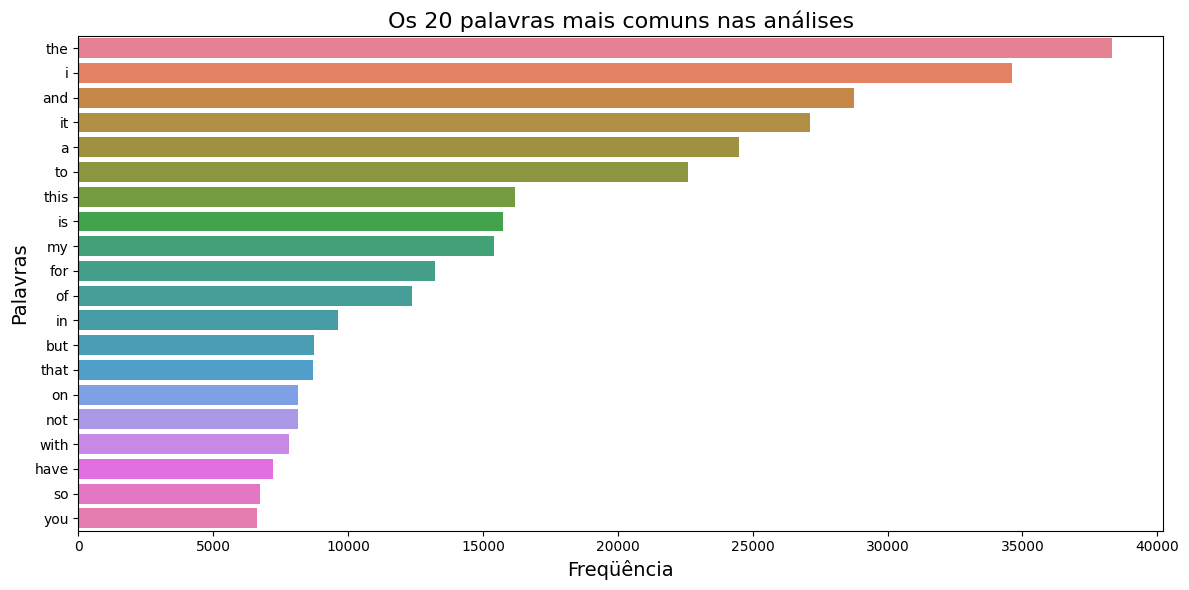

In [103]:
from collections import Counter

# Combine all tokens into a single list
all_tokens = [token for tokens in df['Tokenized_Review'] for token in tokens]

# Count the frequency of tokens
token_counts = Counter(all_tokens)

# Get the top 20 most common tokens
common_tokens = token_counts.most_common(20)  # Limiting to top 20

# Separate tokens and their frequencies
tokens, frequencies = zip(*common_tokens)

# Create a bar plot for the most frequent tokens
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(tokens), palette='husl')  # Changed palette

# Improved title and axis labels
plt.title('Os 20 palavras mais comuns nas análises', fontsize=16)
plt.xlabel('Freqüência', fontsize=14)
plt.ylabel('Palavras', fontsize=14)

# Add gridlines for easier reading of bar heights
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Ensure layout is clean and labels fit well
plt.grid(False)
plt.show()

<ipython-input-104-cc0107f314b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


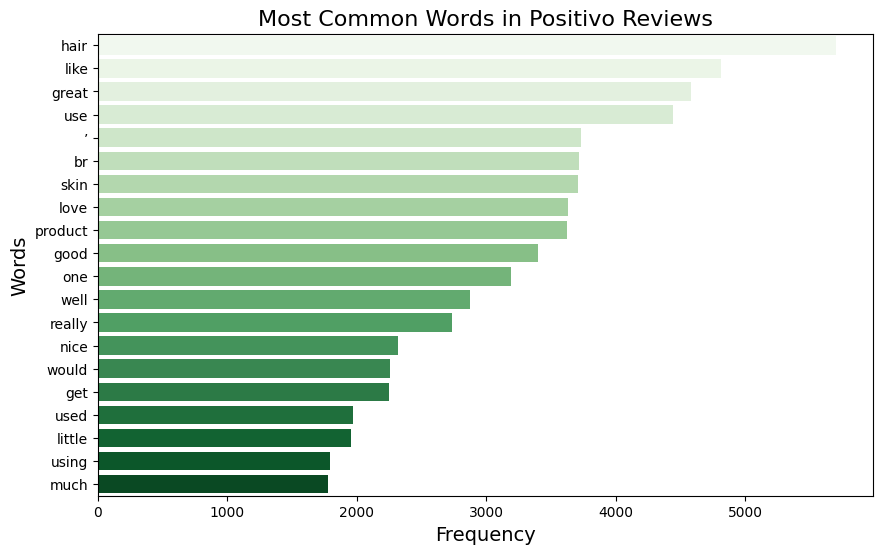

<ipython-input-104-cc0107f314b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


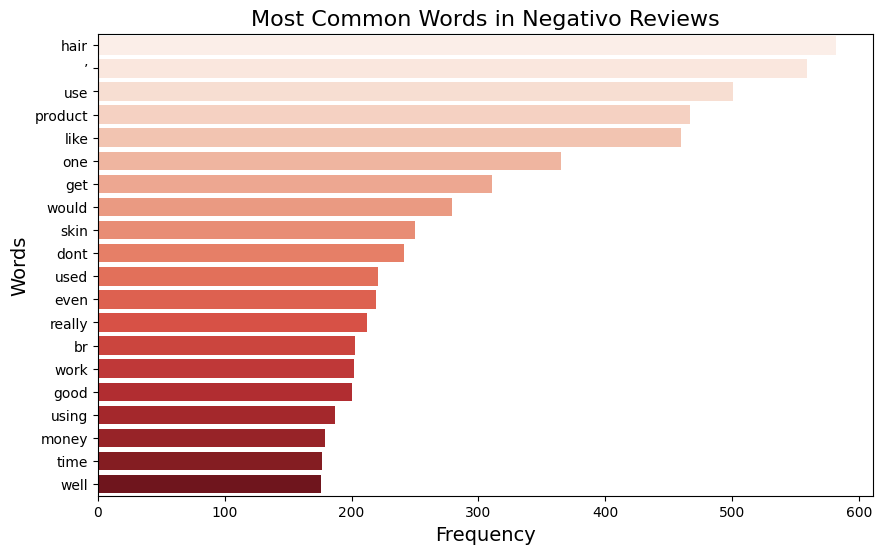

<ipython-input-104-cc0107f314b3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=color)


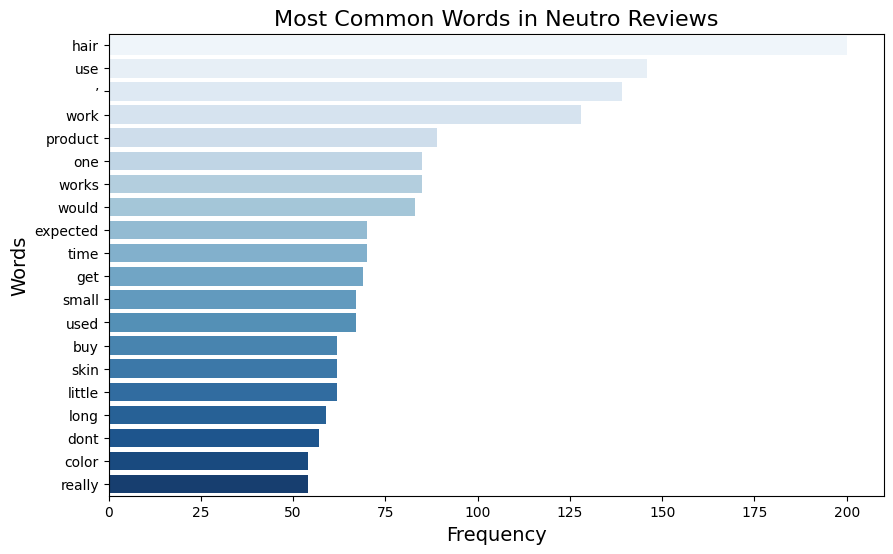

In [104]:
from collections import Counter

# Function to plot the most common words for each sentiment
def plot_most_common_words(common_words, sentiment, color):
    # Unzip the common_words tuple into two lists: words and their respective counts
    words, counts = zip(*common_words)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette=color)

    # Set the title and axis labels
    plt.title(f'Most Common Words in {sentiment} Reviews', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)

    # Display the chart
    plt.show()

# Generate the most common words for each sentiment

# Filter reviews based on sentiment
positive_reviews = df[df['sentiment'] == 'Positivo']['No_Stopwords_Review']
negative_reviews = df[df['sentiment'] == 'Negativo']['No_Stopwords_Review']
neutral_reviews = df[df['sentiment'] == 'Neutro']['No_Stopwords_Review']

# Combine all words into a single list for each sentiment
positive_words_list = [word for review in positive_reviews for word in review]
negative_words_list = [word for review in negative_reviews for word in review]
neutral_words_list = [word for review in neutral_reviews for word in review]

# Count the most common words in each sentiment's word list
positive_words = Counter(positive_words_list).most_common(20)
negative_words = Counter(negative_words_list).most_common(20)
neutral_words = Counter(neutral_words_list).most_common(20)

# Plot the most common words for Positive sentiment
plot_most_common_words(positive_words, 'Positivo', 'Greens')

# Plot the most common words for Negative sentiment
plot_most_common_words(negative_words, 'Negativo', 'Reds')

# Plot the most common words for Neutral sentiment
plot_most_common_words(neutral_words, 'Neutro', 'Blues')

# ***Seção A) Modelos de aprendizado de máquina***
# **Parte 6 - Divisão e teste da coluna de destino**

In [105]:
# Deleting unwanted columns
df = df.drop(columns=['rating', 'title_x',  'images_x', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase', 'main_category', 'title_y', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images_y', 'videos', 'categories', 'details',  'No_Stopwords_Review', 'vader_scores', 'compound'])

# Displaying the first few rows of the dataframe to verify
df.head()

,text,Cleaned_Review,Tokenized_Review,Stemmed_Review,sentiment
0,This spray is really nice. It smells really go...,this spray is really nice it smells really goo...,"[this, spray, is, really, nice, it, smells, re...","[thi, spray, is, realli, nice, it, smell, real...",Positivo
1,"This product does what I need it to do, I just...",this product does what i need it to do i just ...,"[this, product, does, what, i, need, it, to, d...","[thi, product, doe, what, i, need, it, to, do,...",Positivo
2,"Smells good, feels great!",smells good feels great,"[smells, good, feels, great]","[smell, good, feel, great]",Positivo
3,Felt synthetic,felt synthetic,"[felt, synthetic]","[felt, synthet]",Neutro
4,Love it,love it,"[love, it]","[love, it]",Positivo


In [106]:
# prompt: qual o total de linhas na coluna df['Cleaned_Review']

print(len(df['Cleaned_Review']))

20000


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # Limiting to top 14000 features

# Training and testing division
# Total de linhas na coluna Cleaned_Review
print(len(df['Cleaned_Review']))
X = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])
y = df['sentiment']

tfidf_vectorizer

20000


TfidfVectorizer(max_features=3000)

O TfidfVectorizer é usado para converter os dados textuais em recursos numéricos adequados para modelos de aprendizado de máquina. Especificamente, o TF-IDF (Term Frequency-Inverse Document Frequency) ajuda a quantificar a importância de cada palavra em um documento em relação a um corpus de documentos. Veja por que ele está sendo usado:

**1. Converter texto em formato numérico:**
Os modelos de aprendizado de máquina funcionam com dados numéricos, não com texto bruto. O TfidfVectorizer transforma os dados de texto limpos (neste caso, a coluna Cleaned_Review) em uma matriz esparsa de recursos numéricos. Cada palavra nas avaliações se torna um recurso que pode ser usado pelo modelo para classificação.

**2. Capturando a importância das palavras:**
O mecanismo TF-IDF funciona considerando a frequência de uma palavra em um documento (Term Frequency, ou TF) e o quão única essa palavra é em todo o conjunto de documentos (Inverse Document Frequency, ou IDF). Dessa forma, palavras comumente usadas como "o" ou "e" (que não têm muito significado na análise de sentimentos) recebem pontuações mais baixas, enquanto palavras mais importantes e específicas do tópico recebem pontuações mais altas.

**3. Evitando o overfitting para palavras comuns:**
Ao usar o TF-IDF em vez de contagens simples de palavras, você evita que o modelo dê muita importância a palavras que ocorrem com frequência, mas são menos significativas (como "o" ou "é"). Em vez disso, palavras que aparecem em menos documentos, mas têm mais significância (como "excelente" ou "ruim") recebem pesos mais altos.

**4. Reduzindo a dimensionalidade:**
O parâmetro max_features=14000 limita o vetorizador às 14.000 palavras mais importantes (recursos). Isso evita que o modelo seja sobrecarregado por muitos recursos, especialmente se houver muitas palavras exclusivas nas avaliações, o que ajuda a reduzir o custo computacional e potencialmente melhora o desempenho do modelo.

**5. Melhor representação para análise de sentimentos:**
Na análise de sentimentos, certas palavras têm mais peso para determinar se uma avaliação é positiva, negativa ou neutra. A abordagem TF-IDF captura isso e permite que seu modelo aprenda as relações entre palavras e categorias de sentimento de forma mais eficaz do que abordagens simples de saco de palavras.

**6. Representação esparsa:**
O X resultante é uma matriz esparsa, o que significa que apenas valores diferentes de zero (palavras relevantes) são armazenados, o que economiza memória e acelera a computação, especialmente em grandes conjuntos de dados onde muitas palavras não aparecem em todos os documentos.
Em resumo, o TfidfVectorizer ajuda a converter os dados de texto em recursos numéricos enquanto destaca as palavras mais importantes e relevantes, melhorando assim a capacidade do modelo de entender e classificar dados de texto. É comumente usado para tarefas como classificação de texto, análise de sentimento e modelagem de tópicos.

In [108]:
# Visualizing data x
X.shape

(20000, 3000)

In [109]:
# Viewing y data
y.shape

(20000,)

Aqui, realizamos a divisão das variáveis ​​em características e a variável alvo. Primeiro, separamos as variáveis ​​independentes, que são as características usadas para modelagem preditiva. Essas características são os dados de entrada que o modelo usará para aprender padrões e fazer previsões. Em seguida, isolamos a variável dependente, ou a variável alvo, que é o valor que pretendemos prever. Esse processo é crucial para construir e treinar o modelo, garantindo que as características sejam identificadas corretamente e que o modelo possa aprender a relação entre essas características e a variável alvo. Ao dividir adequadamente os dados, aumentamos a capacidade do modelo de prever resultados com precisão com base nas entradas fornecidas

# **Parte 6.1 - Recursos de engenharia**

In [110]:
# Import the LabelEncoder class from sklearn, which is used to convert categorical labels to numeric values
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to the target variable 'y', which contains categorical sentiment labels
# The fit_transform() method encodes the labels (e.g., 'Positive', 'Neutral', 'Negative') into numeric values (e.g., 0, 1, 2)
y = le.fit_transform(y)

# The 'le' object now contains the mapping between the original labels and the numeric values
#le

In [111]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing training data
print("Quantidade de linhas fornecidas para o treino X", X_train.shape)

# Viewing test data
print("Quantidade de linhas fornecidas para o treino y", y_train.shape)

Quantidade de linhas fornecidas para o treino X (16000, 3000)
Quantidade de linhas fornecidas para o treino y (16000,)


Aqui, conduzimos o treinamento do modelo usando uma divisão de treinamento-teste. Adotamos uma divisão 80/20, onde 80% dos dados foram usados ​​para treinamento e os 20% restantes foram reservados para teste. Este procedimento é crucial para avaliar com precisão o desempenho do modelo. O conjunto de treinamento permite que o modelo aprenda padrões e relacionamentos dentro dos dados, enquanto o conjunto de teste, que o modelo não viu durante o treinamento, é usado para validar sua capacidade de generalizar e prever novos dados. Além disso, esta abordagem ajuda a identificar e mitigar problemas como overfitting, garantindo que o modelo não apenas memorize os dados de treinamento, mas também tenha um bom desempenho em dados não vistos.

In [112]:
# Convert your TF-IDF sparse matrix to a dense matrix
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

Aqui, conduzimos o treinamento do modelo usando uma divisão de treinamento-teste. Adotamos uma divisão 80/20, onde 80% dos dados foram usados ​​para treinamento e os 20% restantes foram reservados para teste. Este procedimento é crucial para avaliar com precisão o desempenho do modelo.

O conjunto de treinamento permite que o modelo aprenda padrões e relacionamentos dentro dos dados, enquanto o conjunto de teste, que o modelo não viu durante o treinamento, é usado para validar sua capacidade de generalizar e prever novos dados.

Além disso, esta abordagem ajuda a identificar e mitigar problemas como overfitting, garantindo que o modelo não apenas memorize os dados de treinamento, mas também tenha um bom desempenho em dados não vistos.

In [113]:
# prompt: instale a bibliotec catboost e toarray

!pip install catboost

In [114]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Models to be evaluated
models = [
            # Naive Bayes Model (requires dense matrix)
            GaussianNB(),

            # Decision Tree Model
            DecisionTreeClassifier(random_state=42),

            # Random forest model
            RandomForestClassifier(n_estimators=100, random_state=42),

            # Logistic regression model
            LogisticRegression(random_state=50),

            # Ada Boost Model
            AdaBoostClassifier(random_state=45),

            # XGBoost Model (using CPU instead of GPU)
            XGBClassifier(tree_method='hist', random_state=42), # Changed tree_method to 'hist'

            # LightGBM Model (can use sparse matrix)
            LGBMClassifier(num_leaves=31,
                           boosting_type='gbdt',
                           bagging_fraction=0.9,
                           learning_rate=0.05,
                           feature_fraction=0.9,
                           bagging_freq=50,
                           verbose=50,
                           device='gpu'),

            # K-Nearest Neighbors Model
            KNeighborsClassifier(n_neighbors=13),

            # Gradient Boosting Classifier
            GradientBoostingClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    # For GaussianNB (requires dense matrix)
    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
    else:
        # For all other models
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.4991
Testing Accuracy: 0.4445
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 0.9991
Testing Accuracy: 0.8083
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 0.9991
Testing Accuracy: 0.8400
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.9067
Testing Accuracy: 0.8668
-----------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model 5: AdaBoostClassifier
Training Accuracy: 0.8462
Testing Accuracy: 0.8305
-----------------
Model 6: XGBClassifier
Training Accuracy: 0.9543
Testing Accuracy: 0.8748
-----------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse

LightGBMError: No OpenCL device found

In [115]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Models to be evaluated
models = [
            # Naive Bayes Model (requires dense matrix)
            GaussianNB(),

            # Decision Tree Model
            DecisionTreeClassifier(random_state=42),

            # Random forest model
            RandomForestClassifier(n_estimators=100, random_state=42),

            # Logistic regression model
            LogisticRegression(random_state=50),

            # Ada Boost Model
            AdaBoostClassifier(random_state=45),

            # XGBoost Model (using CPU instead of GPU)
            XGBClassifier(tree_method='hist', random_state=42), # Changed tree_method to 'hist'

            # LightGBM Model (using CPU)
            LGBMClassifier(num_leaves=31,
                           boosting_type='gbdt',
                           bagging_fraction=0.9,
                           learning_rate=0.05,
                           feature_fraction=0.9,
                           bagging_freq=50,
                           verbose=50,
                           device='cpu'), # Changed device to 'cpu'

            # K-Nearest Neighbors Model
            KNeighborsClassifier(n_neighbors=13),

            # Gradient Boosting Classifier
            GradientBoostingClassifier(random_state=42)]

# Evaluate each model
for i, model in enumerate(models):
    # For GaussianNB (requires dense matrix)
    if isinstance(model, GaussianNB):
        model.fit(X_train_dense, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train_dense))
        test_accuracy = accuracy_score(y_test, model.predict(X_test_dense))
    else:
        # For all other models
        model.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("-----------------")

Model 1: GaussianNB
Training Accuracy: 0.4991
Testing Accuracy: 0.4445
-----------------
Model 2: DecisionTreeClassifier
Training Accuracy: 0.9991
Testing Accuracy: 0.8083
-----------------
Model 3: RandomForestClassifier
Training Accuracy: 0.9991
Testing Accuracy: 0.8400
-----------------
Model 4: LogisticRegression
Training Accuracy: 0.9067
Testing Accuracy: 0.8668
-----------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model 5: AdaBoostClassifier
Training Accuracy: 0.8462
Testing Accuracy: 0.8305
-----------------
Model 6: XGBClassifier
Training Accuracy: 0.9543
Testing Accuracy: 0.8748
-----------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.988504
[LightGBM] [Debug] Dataset::G